In [3]:
import ROOT as r
import numpy as np
from array import array
from scipy.stats import poisson

ImportError: No module named 'ROOT'

In [2]:
f = r.TFile("sample_Davy.root")    # open file
f.ls()                          # list the contents
dataTree = f.Get("Reduced")    # extract a TTree with name "Reduced"
dataTree.Print()   

TFile**		sample_Davy.root	
 TFile*		sample_Davy.root	
  KEY: TTree	Reduced;1	Reduced SPD ntuple
******************************************************************************
*Tree    :Reduced   : Reduced SPD ntuple                                     *
*Entries :   560852 : Total =        22541963 bytes  File  Size =   13418836 *
*        :          : Tree compression factor =   1.68                       *
******************************************************************************
*Br    0 :sqrtS     : sqrtS/F                                                *
*Entries :   560852 : Total  Size=    2250447 bytes  File Size  =      19065 *
*Baskets :       71 : Basket Size=      32000 bytes  Compression= 117.95     *
*............................................................................*
*Br    1 :nU        : nU/I                                                   *
*Entries :   560852 : Total  Size=    2250222 bytes  File Size  =      18560 *
*Baskets :       71 : Basket Size= 

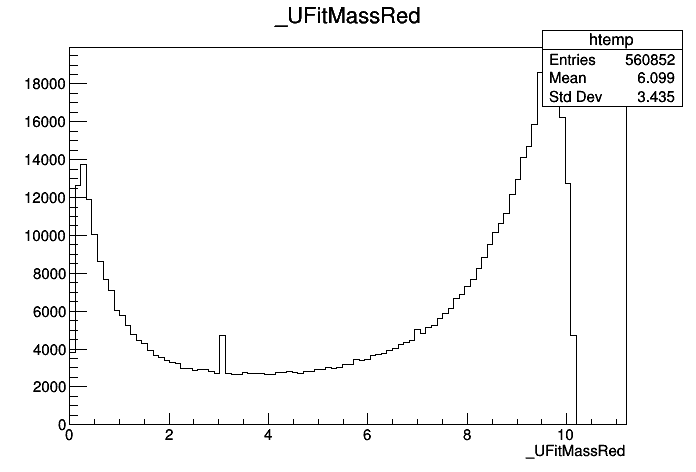

In [3]:
c = r.TCanvas("c","c")
dataTree.Draw("_UFitMassRed") 
c.Draw()

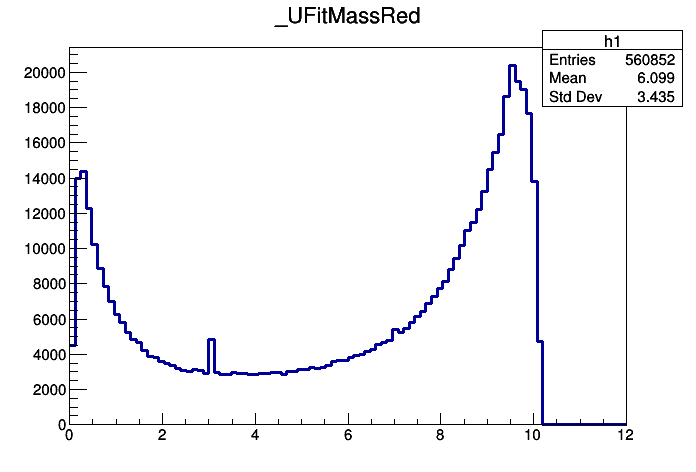

In [4]:
h1 = r.TH1F("h1","_UFitMassRed",100,0,12)      #Creates histogram with 100 bins, values from -4000 to 4000 
dataTree.Draw("_UFitMassRed>>h1")                         #Fills histogram with data 
h1.Draw()                                         
c.Draw()

In [5]:
y = 85

def bin(n):
    summed = []
    z = 0
    for i in range(y+1):
        z = h1.GetBinContent(i)
        summed.append(z)
    return summed
content = bin(5)

In [6]:
x = 85

def bin(n):
    summed = []
    z = 0
    for i in range(1, x+1):
        z = h1.GetBinCenter(i)
        summed.append(z)
    return summed
center = array("d",bin(1))

In [7]:
variable = 5

def sum(yk,x,z):
    summed = []
    for i in range(variable, (len(yk)-variable)):
        YK = 0
        for m in range(x,z+1):
            YK += yk[i+m]
        summed.append(YK)
    return summed

g = (1.0/((2*variable)+1))

def running_average(content, variable):
    return g*np.array(sum(content, -variable, variable))

average = array("d",running_average(content, variable)) # ROOT array (5, 81)

Average = (running_average(content, variable)) #NUMPY array (5, 81)

In [8]:
y_mod = 80

def bin(n):
    summed = []
    z = 0
    for i in range(5, y_mod+1):
        z = h1.GetBinContent(i)
        summed.append(z)
    return summed
content_mod = bin(5) #range(5, 81)

In [9]:
x_mod = 80
def bin(n):
    summed = []
    z = 0
    for i in range(5, x_mod+1):
        z = h1.GetBinCenter(i)
        summed.append(z)
    return summed
center_mod = array("d",bin(1))

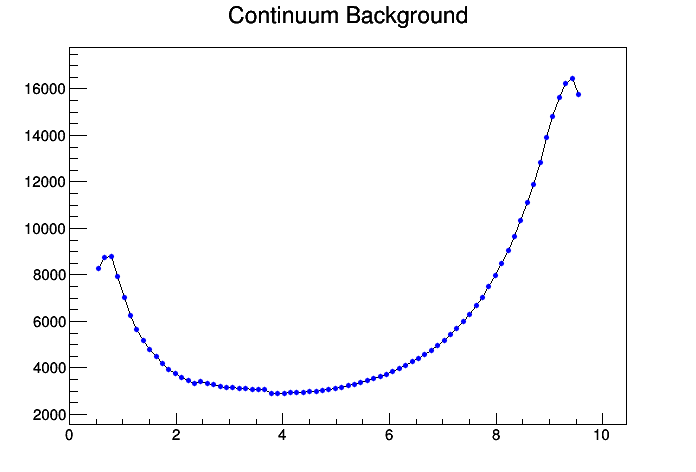

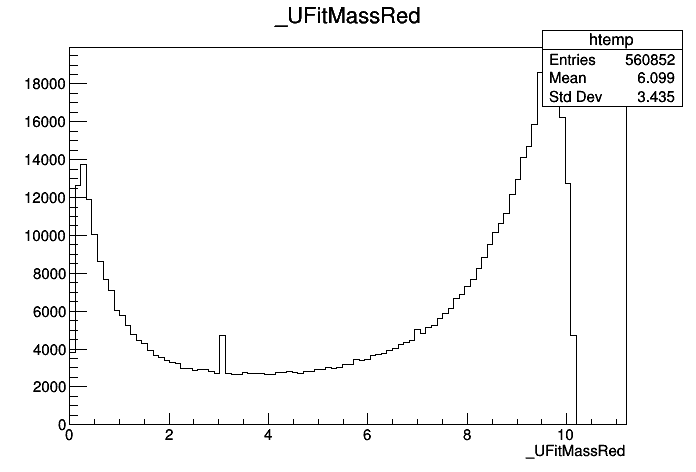

In [10]:
K = r.TCanvas("K","K")
C_background = r.TGraph(76, center_mod, average)
C_background.SetTitle("Continuum Background")
C_background.Draw()
K.Draw()

c2 = r.TCanvas("C","C")
dataTree.Draw("_UFitMassRed") 
c2.Draw()

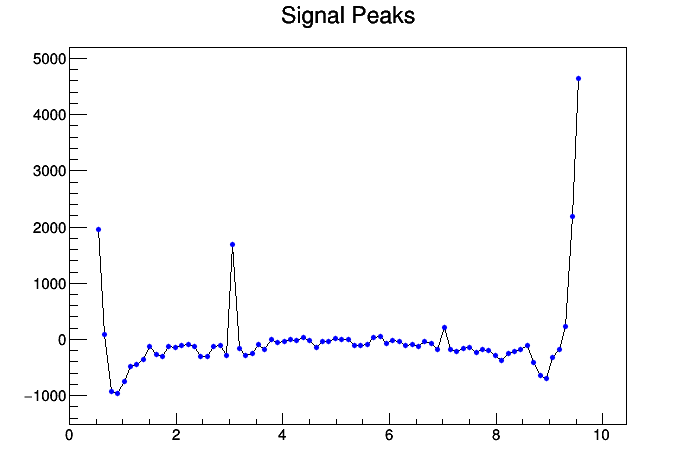

In [11]:
signal_list = content_mod - Average
signal_array = array("d", signal_list)

D = r.TCanvas("D","D")
D_signal = r.TGraph(76, center_mod, signal_array)
D_signal.SetTitle("Signal Peaks") 
D_signal.Draw()
D.Draw()

In [12]:
#prob = poisson.cdf(,)
#print(prob)

In [14]:
# Supposed to find φ, J/ψ, ψ(2S), and Υ(1S)
# Do not see φ = 1.019445 GeV
# Do not see ψ(2S) = 3.686097 GeV
# J/ψ = 3.096916 GeV/c2
# Υ(1S) = 9.46030 GeV
# Something around .5 GeV?
# Something is around 7 GeV?